In [3]:
import pandas as pd
import numpy as np
#Load 2 Datasets using pandas 
df=pd.read_csv("diabetic_data.csv")
id_map=pd.read_csv("IDS_mapping.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
id_map.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [9]:
print("Diabetes Data Missing Values:\n",df.isnull().sum(),"\n")
print("IDs Mapping Data Missing values:\n",id_map.isnull().sum())

Diabetes Data Missing Values:
 encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride      

In [11]:
#After Dropping 'max_glu_serum' and 'A1Cresult' columns 
df=df.drop('max_glu_serum',axis=1)
df=df.drop('A1Cresult',axis=1)
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [13]:
# Replace empty strings or spaces with actual NaN
id_map['admission_type_id'] = id_map['admission_type_id'].replace(r'^\s*$', pd.NA, regex=True)
id_map['description'] = id_map['description'].replace(r'^\s*$', pd.NA, regex=True)
# Remove extra spaces
id_map['admission_type_id'] = id_map['admission_type_id'].astype(str).str.strip()
id_map['description'] = id_map['description'].astype(str).str.strip()
#Drop rows with missing IDs or descriptions
id_map_clean=id_map.dropna(subset=['admission_type_id','description'])

In [15]:
# Convert both to string and remove any spaces 
df['admission_type_id'] = df['admission_type_id'].astype(str).str.strip()
id_map_clean['admission_type_id'] = id_map_clean['admission_type_id'].astype(str).str.strip()
# Merge the cleaned ID map into your main DataFrame
df = df.merge(id_map_clean, on='admission_type_id', how='left')
# Rename the column for clarity
df.rename(columns={'description': 'admission_type_desc'}, inplace=True)

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [19]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'admission_type_desc'],
      dtype='object')

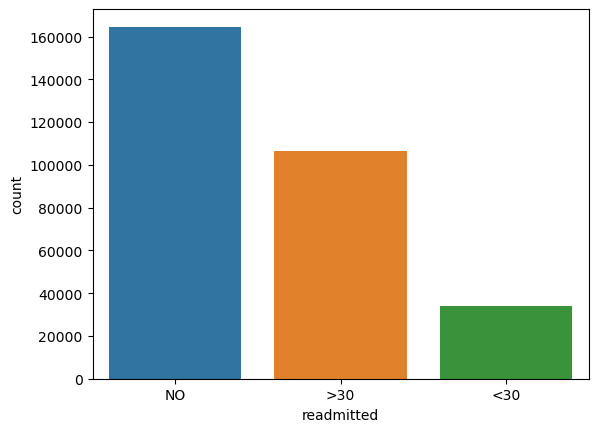

In [93]:
#Exploratory Data Analysis
#readmitted distribution
sns.countplot(x='readmitted',data=df);

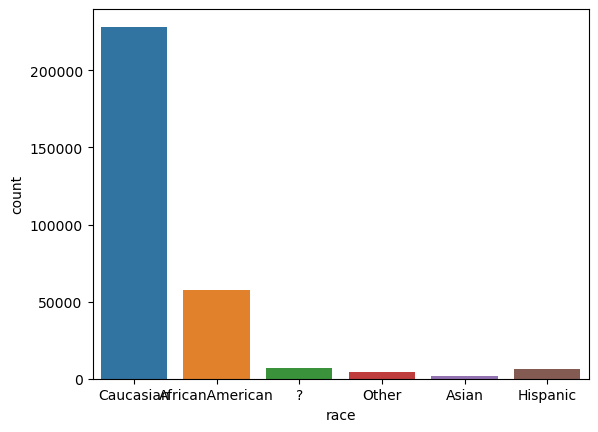

In [73]:
#Univariate Analysis (one column at a time)
#Race
sns.countplot(x='race',data=df);

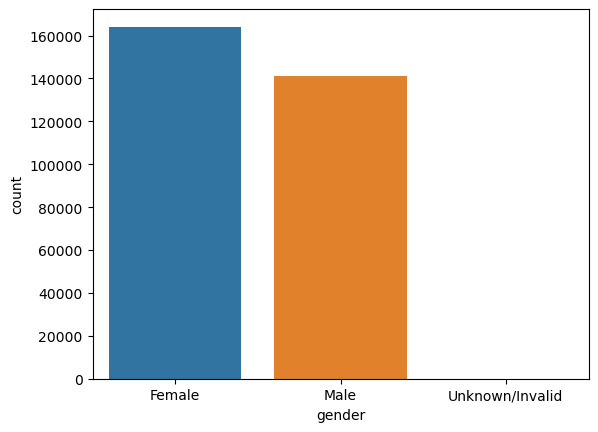

In [75]:
#Gender
sns.countplot(x='gender',data=df);

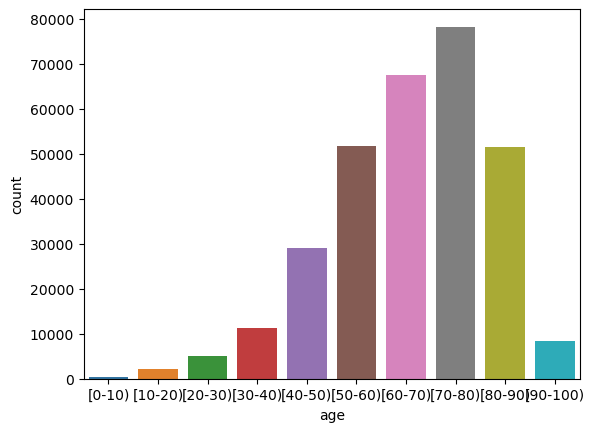

In [77]:
#age
sns.countplot(x='age',data=df);

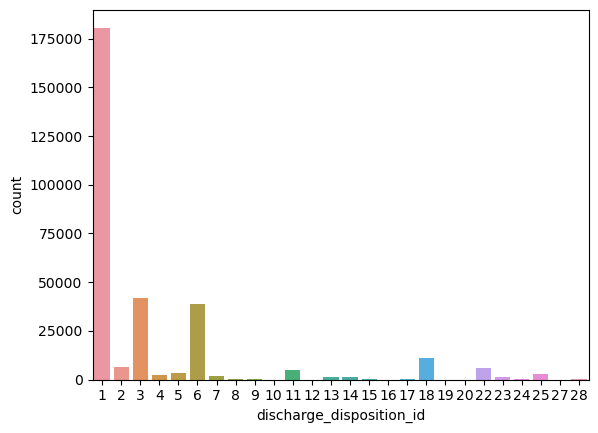

In [91]:
#discharge_disposition_id
sns.countplot(x='discharge_disposition_id', data=df);

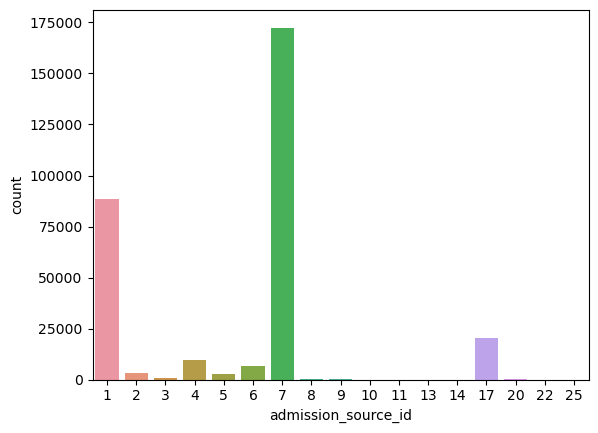

In [95]:
#admission_source_id
sns.countplot(x='admission_source_id', data=df);

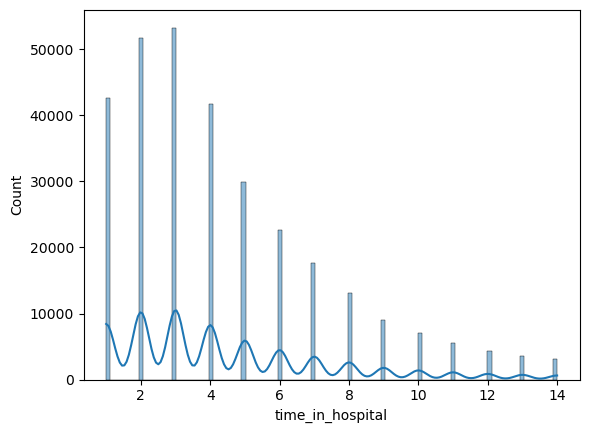

In [103]:
#Numerical Features
#time_in_hospital
sns.histplot(df['time_in_hospital'], kde=True);

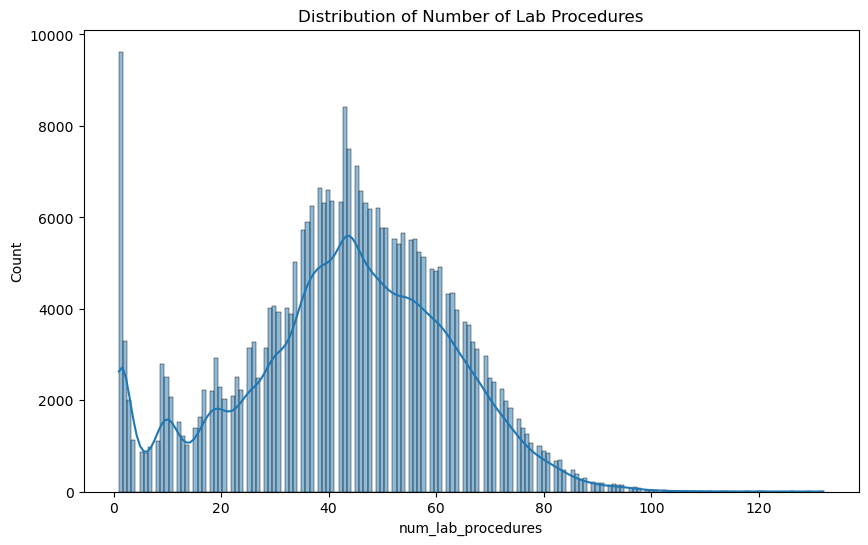

In [111]:
#plot for num_lab_procedures
plt.figure(figsize=(10,6))
sns.histplot(df['num_lab_procedures'],kde=True)
plt.title("Distribution of Number of Lab Procedures")
plt.show()

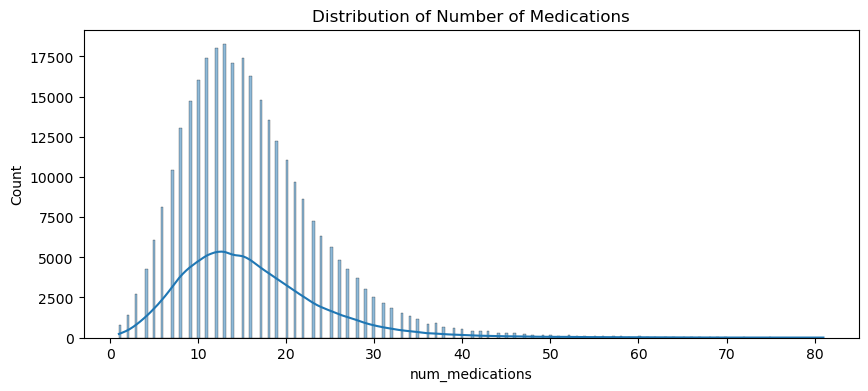

In [113]:
#plot for num_medications
plt.figure(figsize=(10,4))
sns.histplot(df['num_medications'], kde=True)
plt.title("Distribution of Number of Medications")
plt.show()

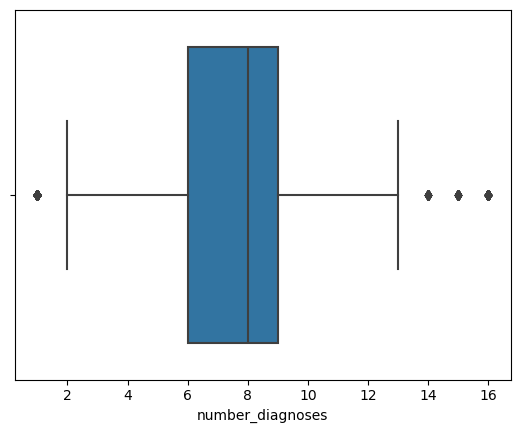

In [121]:
#number_diagnoses
sns.boxplot(x=df['number_diagnoses']);

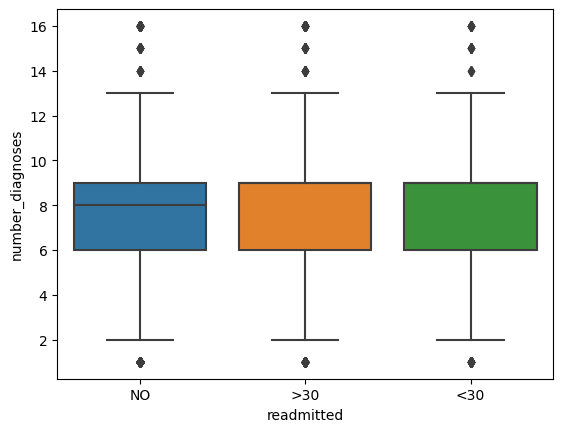

In [125]:
sns.boxplot(x='readmitted',y='number_diagnoses',data=df);

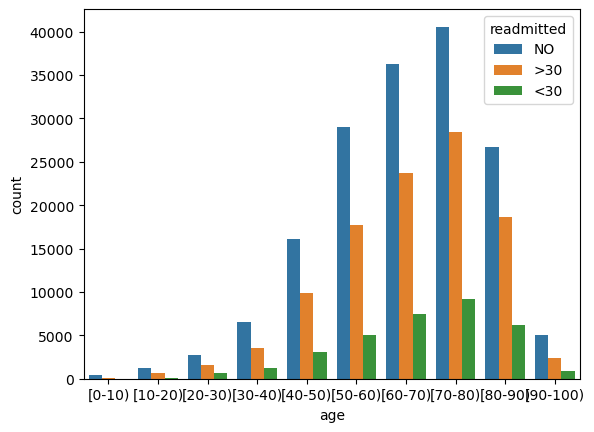

In [127]:
#Bivariate Analysis
sns.countplot(x='age', hue='readmitted', data=df);

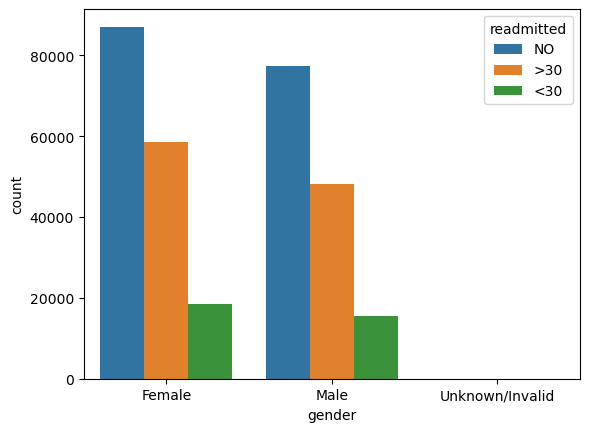

In [131]:
sns.countplot(x='gender',hue='readmitted',data=df);

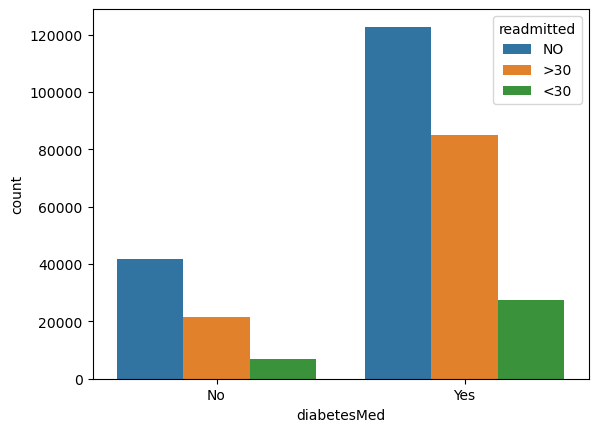

In [143]:
sns.countplot(x='diabetesMed',hue='readmitted',data=df);

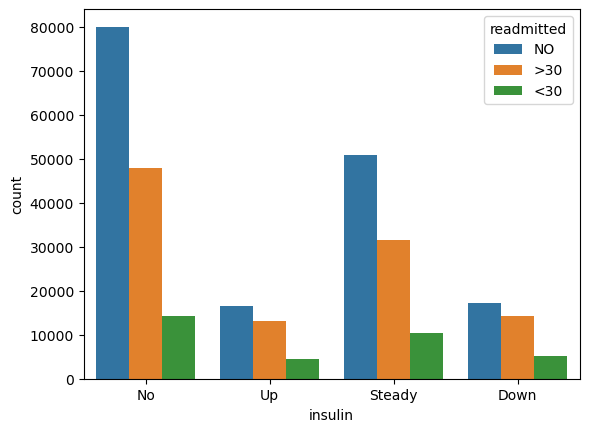

In [145]:
sns.countplot(x='insulin',hue='readmitted',data=df);

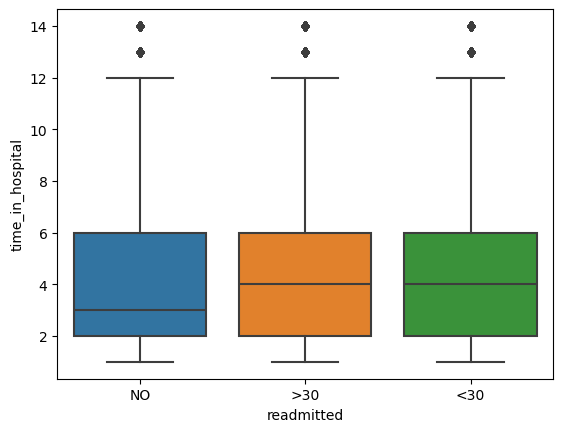

In [149]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df);

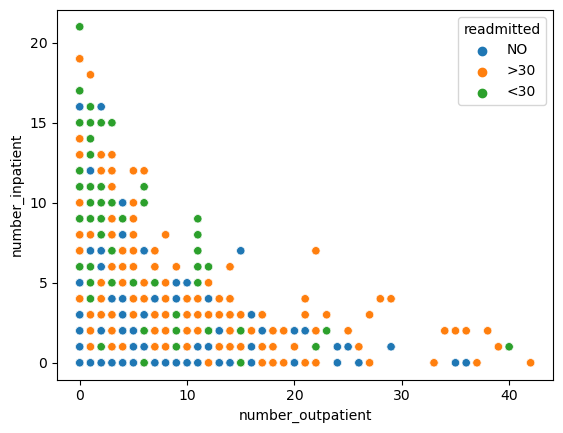

In [159]:
sns.scatterplot(x='number_outpatient', y='number_inpatient', hue='readmitted', data=df);

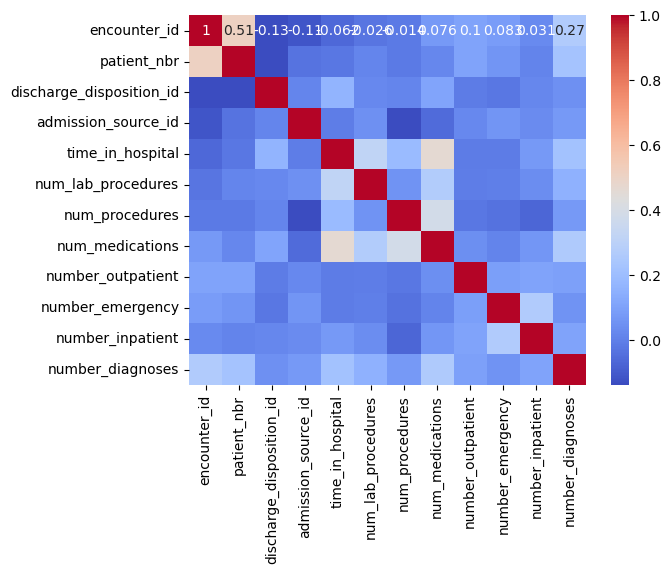

In [167]:
#correlation between numerical features 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

In [43]:
#encoding the categorical columns
#Gender 
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [59]:
df['race']=df['race'].map({'Caucasian':1,'AfricanAmerican':2,'?':3,'Hispanic':4,'Other':5,'Asian':6})

In [61]:
def map_diagnosis(code):
    try:
        code=float(code)
    except:
        return 'Other'
    if 390<=code<=459 or code==785:
        return 'Circulatory'
    elif 460<=code<=579 or code==786:
        return 'Respiratory'
    elif 520<=code<=579 or code==787:
        return 'Digestive'
    elif 250<=code<251:
        return 'Diabetes'
    elif 800<=code<=999:
        return 'Injury'
    elif 710<=code<=739:
        return 'Musculoskeletal'
    elif 580<=code<=629 or code==788:
        return 'Genitourinary'
    else:
        return 'Other'
        

In [63]:
df['diag_1']=df['diag_1'].apply(map_diagnosis)
df['diag_2']=df['diag_2'].apply(map_diagnosis)
df['diag_3']=df['diag_3'].apply(map_diagnosis)

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diag_1']=le.fit_transform(df['diag_1'])
df['diag_2']=le.fit_transform(df['diag_2'])
df['diag_3']=le.fit_transform(df['diag_3'])

In [31]:
drug_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]
df = pd.read_csv("diabetic_data.csv", dtype={col: str for col in drug_columns})


In [33]:
drug_mapping = {'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
for col in drug_columns:
    df[col] = df[col].map(drug_mapping)


In [35]:
df['change']=df['change'].map({'No':0, 'Ch':1})
df['diabetesMed']=df['diabetesMed'].map({'No':0, 'Yes':1})
df['readmitted']=df['readmitted'].map({'No':0, '>30':1, '<30':2})

In [37]:
age_mapping = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4,
               '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8,
               '[80-90)': 9, '[90-100)': 10}
df['age'] = df['age'].map(age_mapping)


In [39]:
df['weight'].replace('?', np.nan, inplace=True)
df.drop('weight', axis=1, inplace=True)  


In [45]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['gender'] = df['gender'].astype(int)


In [47]:
df = df.dropna(subset=['readmitted'])


In [49]:
df['medical_specialty'].replace('?',np.nan, inplace=True)

In [51]:
df['medical_specialty']=le.fit_transform(df['medical_specialty'])
df.replace('?', np.nan, inplace=True)

In [55]:
payer_code_mapping = {
    'MC': 0, 'HM': 1, 'SP': 2, 'BC': 3, 'MD': 4, 'CP': 5,
    'UN': 6, 'CM': 7, 'OG': 8, 'DM': 9, 'PO': 10, 'MP': 11,
    'CH': 12, 'OT': 13, 'WC': 14, 'SI': 15
}
df['payer_code'] = df['payer_code'].map(payer_code_mapping)
df['payer_code'] = df['payer_code'].fillna(-1).astype(int)

In [89]:
df['max_glu_serum'].fillna('None', inplace=True)
df['A1Cresult'].fillna('None', inplace=True)

In [91]:
glu_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

df['max_glu_serum'] = df['max_glu_serum'].map(glu_mapping)
df['A1Cresult'] = df['A1Cresult'].map(a1c_mapping)


In [71]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

In [99]:
x=df.drop('readmitted', axis=1)
y=df['readmitted']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [101]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train_encoded, y_train)
scale_pos_weight = (y_train == 1.0).sum() / (y_train == 2.0).sum()
lgbm = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='f1',cv=3, verbose=2, n_jobs=-1
)
grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_
y_probs = best_model.predict_proba(x_test_encoded)[:, 1]
best_thresh = 0.5
best_f1 = 0
for thresh in np.arange(0.1, 0.91, 0.01):
    y_pred_thresh = np.where(y_probs >= thresh, 2.0, 1.0)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=2.0)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh
y_pred_final = np.where(y_probs >= best_thresh, 2.0, 1.0)
print(f"\nBest Threshold: {best_thresh:.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 28431, number of negative: 28431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 56862, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best Threshold: 0.35
Accuracy: 0.3889
Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.24      0.38      7114
         2.0       0.26      0.84      0.40      2267

    accuracy                           0.39      9381
   macro avg       0.55      0.54      0.39      9381
weighted avg       0.69      0.39      0.38      9381

Confusion Matrix:
[[1733 5381]
 [ 352 1915]]


In [109]:
import pickle
with open('lgbm_model1.pkl', 'wb') as f:
    pickle.dump(best_model,f)